# Motorcycle_Sales_Analysis

# importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df=pd.read_csv("C:\\Users\\91772\\OneDrive\\Desktop\\Motorcycle sales analysis.csv")
df

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


# overview of dataset

- **Shape:** (1000, 8) → 1000 rows and 8 columns.
# Columns:
- **date:** Sales transaction date. (Object/String)
- **warehouse:** Warehouse location where the sale occurred. (Object)
- **client_type:** Type of client (Retail or Wholesale). (Object)
- **product_line:** Category of motorcycle parts/products sold. (Object)
- **quantity:** Number of units sold. (Integer)
- **unit_price:** Price per unit. (Float)
- **total:** Total sale amount. (Float)
- **payment:** Payment method used (Credit card, Cash, Transfer). (Object)
- **Missing Values:** No missing values in any column.
# Data Types:
- **Object (Strings):** date, warehouse, client_type, product_line, payment
- **Numeric:** quantity, unit_price, total

In [3]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


# Data Exploration

In [78]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [29]:
df.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

In [5]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [6]:
df.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

# Analysis

In [11]:
print(df['warehouse'].nunique())
print(df['warehouse'].unique())

3
['Central' 'North' 'West']


In [12]:
print(df['client_type'].nunique())
print(df['client_type'].unique())

2
['Retail' 'Wholesale']


In [75]:
print(df['product_line'].nunique())
print(df['product_line'].unique())

6
['Miscellaneous' 'Breaking system' 'Suspension & traction' 'Frame & body'
 'Engine' 'Electrical system']


In [76]:
print(df['payment'].nunique())
print(df['payment'].unique())

3
['Credit card' 'Cash' 'Transfer']


In [77]:
print(df['date'].nunique())
print(df['date'].unique())

89
['2021-06-01' '2021-06-02' '2021-06-03' '2021-06-04' '2021-06-05'
 '2021-06-06' '2021-06-07' '2021-06-08' '2021-06-09' '2021-06-10'
 '2021-06-11' '2021-06-12' '2021-06-13' '2021-06-14' '2021-06-15'
 '2021-06-16' '2021-06-17' '2021-06-18' '2021-06-19' '2021-06-20'
 '2021-06-21' '2021-06-22' '2021-06-23' '2021-06-24' '2021-06-25'
 '2021-06-26' '2021-06-27' '2021-06-28' '2021-06-29' '2021-06-30'
 '2021-07-01' '2021-07-02' '2021-07-03' '2021-07-04' '2021-07-05'
 '2021-07-06' '2021-07-07' '2021-07-08' '2021-07-09' '2021-07-10'
 '2021-07-11' '2021-07-12' '2021-07-13' '2021-07-14' '2021-07-15'
 '2021-07-16' '2021-07-17' '2021-07-18' '2021-07-19' '2021-07-20'
 '2021-07-21' '2021-07-22' '2021-07-23' '2021-07-24' '2021-07-25'
 '2021-07-26' '2021-07-27' '2021-07-28' '2021-07-29' '2021-07-30'
 '2021-07-31' '2021-08-01' '2021-08-02' '2021-08-03' '2021-08-04'
 '2021-08-05' '2021-08-06' '2021-08-07' '2021-08-08' '2021-08-09'
 '2021-08-10' '2021-08-11' '2021-08-12' '2021-08-13' '2021-08-14'
 '2021-

In [80]:
df['product_line'].value_counts()

product_line
Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: count, dtype: int64

In [87]:
df.groupby('product_line')['client_type'].max()

product_line
Breaking system          Wholesale
Electrical system        Wholesale
Engine                   Wholesale
Frame & body             Wholesale
Miscellaneous            Wholesale
Suspension & traction    Wholesale
Name: client_type, dtype: object

In [85]:
df.groupby('product_line')['client_type'].value_counts()

product_line           client_type
Breaking system        Retail         175
                       Wholesale       55
Electrical system      Retail         155
                       Wholesale       38
Engine                 Retail          48
                       Wholesale       13
Frame & body           Retail         128
                       Wholesale       38
Miscellaneous          Retail          92
                       Wholesale       30
Suspension & traction  Retail         177
                       Wholesale       51
Name: count, dtype: int64

In [113]:
df.groupby('product_line')['quantity'].sum()

product_line
Breaking system          2130
Electrical system        1698
Engine                    627
Frame & body             1619
Miscellaneous            1176
Suspension & traction    2145
Name: quantity, dtype: int64

In [91]:
df.groupby('product_line')['payment'].value_counts()

product_line           payment    
Breaking system        Credit card    150
                       Transfer        55
                       Cash            25
Electrical system      Credit card    131
                       Transfer        38
                       Cash            24
Engine                 Credit card     42
                       Transfer        13
                       Cash             6
Frame & body           Credit card    109
                       Transfer        38
                       Cash            19
Miscellaneous          Credit card     74
                       Transfer        30
                       Cash            18
Suspension & traction  Credit card    153
                       Transfer        51
                       Cash            24
Name: count, dtype: int64

<Axes: ylabel='quantity'>

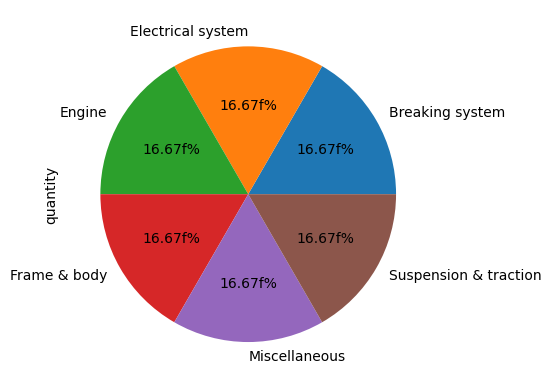

In [95]:
df.groupby('product_line')['quantity'].max().plot(kind='pie',autopct='%.2ff%%')

# The chart represents the maximum quantity sold in a single transaction for each product line. 

**1 Some product lines have higher peaks**
- A few categories have larger maximum sales per transaction, meaning at some point, a significant quantity of that product was sold in a single order.

**2 Product demand varies**
- Some product lines might have a higher number of transactions but with smaller individual order sizes, while others may have fewer transactions but larger individual orders.

**3 Potential bulk purchases**
- If one product line shows a very high max quantity, it could indicate bulk purchases, likely from wholesale clients.

C:\Users\91772\AppData\Local\Temp\ipykernel_16056\3591292432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A = sns.countplot(x=df["client_type"], palette="Set1")


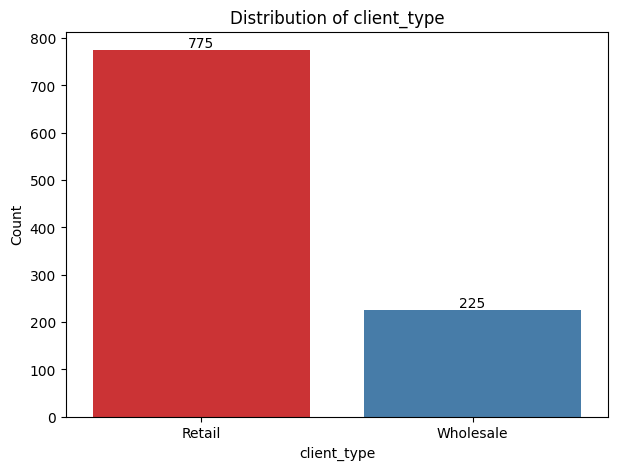

In [98]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["client_type"], palette="Set1")
for i in A.containers:
    A.bar_label(i)
    
plt.title("Distribution of client_type")
plt.xlabel("client_type")
plt.ylabel("Count")
plt.show()

# Trends:
- If Retail has a higher count, it means more individual customers make purchases.
- If Wholesale dominates, bulk purchases from businesses might drive sales.

C:\Users\91772\AppData\Local\Temp\ipykernel_16056\3426117821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A = sns.countplot(x=df["warehouse"], palette="Set1")


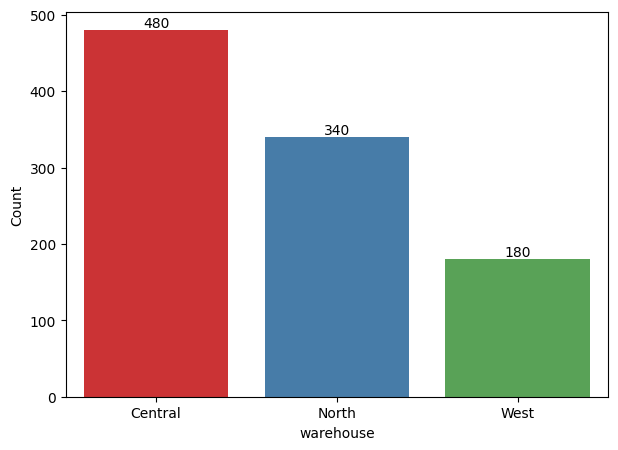

In [99]:
plt.figure(figsize=(7, 5))

A = sns.countplot(x=df["warehouse"], palette="Set1")
for i in A.containers:
    A.bar_label(i)
plt.xlabel("warehouse")
plt.ylabel("Count")
plt.show()

# Insights from the Chart:
**1 Warehouse Activity Comparison:**
- The chart shows which warehouse processed the most sales.
- Taller bars indicate higher transaction counts.

**2 Operational Insights:**
- A warehouse with significantly higher sales might be a key hub.
- A lower transaction count in a warehouse could indicate lower demand or stock availability issues.

**3 Bar Labels:**
- The exact transaction count for each warehouse is displayed on the bars for clarity.# 

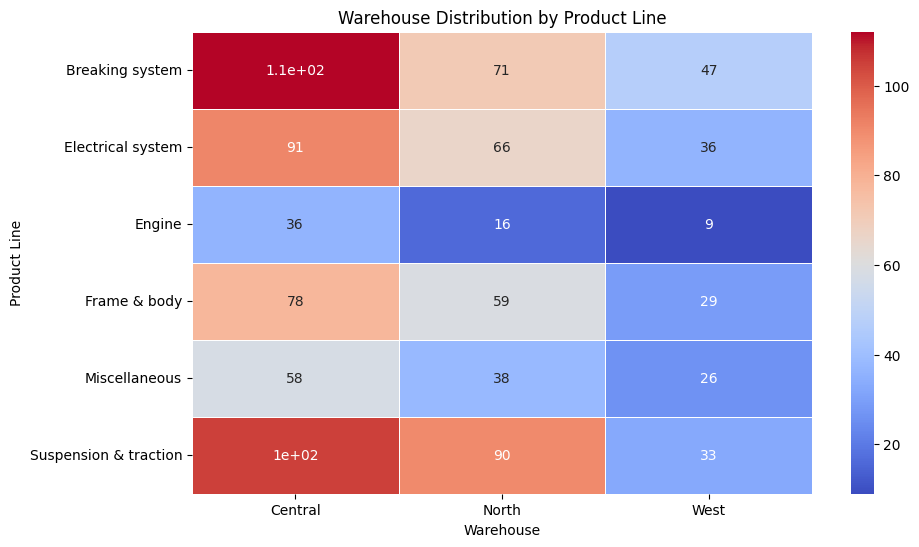

In [112]:
# Group by product line and warehouse, then count occurrences
data = df.groupby(['product_line', 'warehouse']).size().unstack(fill_value=0.5)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Warehouse Distribution by Product Line')
plt.xlabel('Warehouse')
plt.ylabel('Product Line')
plt.yticks(rotation=0)
plt.show()

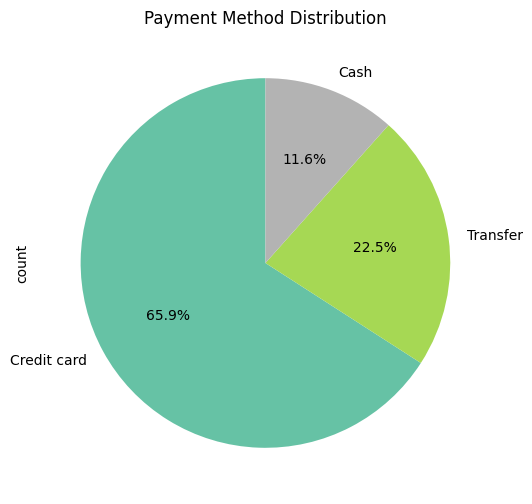

In [90]:
plt.figure(figsize=(6, 6))
df['payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Payment Method Distribution')
plt.show()

# Purpose:
Shows the distribution of different payment methods used in sales transactions.

# Conclusion of the Motorcycle Sales Analysis
**1 Sales & Product Trends:**

The Breaking System and Suspension & Traction categories had the highest sales.
Some product lines had higher maximum quantity orders, indicating potential bulk purchases.

**2 Warehouse Performance:**

Certain warehouses handled higher sales volumes, possibly acting as key distribution hubs.
Some warehouses had low sales for specific products, suggesting potential inventory imbalances or regional demand variations.

**3 Client Type Distribution:**

Retail clients had a higher number of transactions compared to wholesale clients, suggesting a customer-driven market.
Wholesale clients tended to purchase in larger quantities per order.

**4 Payment Preferences:**

A dominant payment method (e.g., Credit Card or Cash) suggests strong customer preference.
Other payment methods were less utilized, indicating room for business strategy adjustments.